In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import plotly.graph_objects as go

In [35]:
data1 = np.random.rand(8, 8)
data2 = np.random.rand(8, 8)
tie1 = np.random.rand(8, 8)
tie2 = np.random.rand(8, 8)
n = 1
viz_input = {'Cards':data1, 'Card_Ties':tie1, 'Tricks':data2, 'Trick_Ties':tie2, 'n':n}

In [36]:
def get_heatmaps(format:str) -> None:
    #get arrays into seperate variables
    cards = viz_input['Cards']
    tricks = viz_input['Tricks']
    Cties = viz_input['Card_Ties']
    Tties = viz_input['Trick_Ties']
    n = viz_input['n']
    #fix the format
    var_cards = np.transpose(np.round((cards)*100,0))
    var_tricks = np.transpose(np.round((tricks)*100,0))
    card_ties= np.transpose(np.round((Cties)*100,0)) 
    trick_ties = np.transpose(np.round((Tties)*100,0))
    #remove the diagonal "nonsense" games (ex. RRR vs RRR)
    temp = [var_cards,var_tricks,card_ties,trick_ties]
    for i in temp:
        array = i
        array[0,7] = None
        array[1,6] = None
        array[2,5] = None
        array[3,4] = None
        array[4,3] = None
        array[5,2] = None
        array[6,1] = None
        array[7,0] = None
    ##building appropriate labels for cards
    ct_labels=[]
    for i in range(len(cards)):
        for j in range(len(Cties)):
            new_cards_ties=str(var_cards[i][j])[:-2]+' ('+str(card_ties[i][j])[:-2]+')'
            ct_labels+=[new_cards_ties]
    ct_labels=np.reshape(ct_labels,(8,8))
    ##building appropriate labels for tricks
    tt_labels=[]
    for i in range(len(tricks)):
        for j in range(len(Tties)):
            new_tricks_ties=str(var_tricks[i][j])[:-2]+' ('+str(trick_ties[i][j])[:-2]+')'
            tt_labels+=[new_tricks_ties]
    tt_labels=np.reshape(tt_labels,(8,8))
    #remove the same diagonal for the labels
    temp2 = [ct_labels, tt_labels]
    for i in temp2:
        array = i
        array[0,7] = ''
        array[1,6] = ''
        array[2,5] = ''
        array[3,4] = ''
        array[4,3] = ''
        array[5,2] = ''
        array[6,1] = ''
        array[7,0] = ''
    
    if format == 'png':
        __create_png(var_cards, ct_labels, var_tricks, tt_labels)
    
    elif format == 'html':
        __create_html(var_cards, ct_labels, var_tricks, tt_labels, card_ties, trick_ties)

    else:
        print('Format unsupported')
    return

In [39]:
def __create_png(var_cards, ct_labels, var_tricks, tt_labels) -> None:
        
    x_axis_labels = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'] #me 
    y_axis_labels = ['RRR','RRB','RBR','RBB','BRR','BRB','BBR','BBB'] #opponent
    ##cards plot
    fig_cards=plt.figure(figsize=(8,8))
    ax_cards = plt.axes()
    sns.heatmap(var_cards, annot= ct_labels, fmt="",annot_kws={"size": 10},linewidths=.5,  cmap='Blues', 
                 cbar=False,vmin=0, vmax=100)
    plt.xlabel('My Guesses', fontsize=14)
    plt.ylabel('Opponent Guesses', fontsize=14)
    ax_cards.set_xticklabels(x_axis_labels, fontsize=12)
    ax_cards.set_yticklabels(y_axis_labels, fontsize=12)
    ax_cards.set_facecolor('#DBDBDB')
    ##making and adjusting the colorbar
    cbar_ax = fig_cards.add_axes([.95, 0.11, 0.035, .77])
    cb = fig_cards.colorbar(ax_cards.collections[0], cax=cbar_ax)
    cb.outline.set_linewidth(.2)
    
    plt.suptitle("Probability (%) I Win Penney's Game by Cards\n(n="+str(n)+'), [Win (Tie)]', y=0.95, fontsize = 17)

    plt.savefig('figures/heatmap_n'+str(n)+"_byCards.png", bbox_inches = 'tight', facecolor = 'white')
    plt.show()
    
    ##tricks plot
    fig_tricks=plt.figure(figsize=(8,8))
    ax_tricks = plt.axes()
    sns.heatmap(var_tricks, annot= tt_labels, fmt="",annot_kws={"size": 10},linewidths=.5,  cmap='Blues', 
                 cbar=False, vmin=0, vmax=100)
    plt.xlabel('My Guesses', fontsize=14)
    plt.ylabel('Opponent Guesses', fontsize=14)
    ax_tricks.set_xticklabels(x_axis_labels, fontsize=12)
    ax_tricks.set_yticklabels(y_axis_labels, fontsize=12)
    ax_tricks.set_facecolor('#DBDBDB')
    ##making and adjusting the colorbar
    cbar_ax = fig_tricks.add_axes([.95, 0.11, 0.035, .77])
    cb = fig_tricks.colorbar(ax_cards.collections[0], cax=cbar_ax)
    cb.outline.set_linewidth(.2)
    
    plt.suptitle("Probability (%) I Win Penney's Game by Tricks\n(n="+str(n)+'), [Win (Tie)]', y=0.95, fontsize = 17)
    plt.savefig('figures/heatmap_n'+str(n)+"_byTricks.png", bbox_inches = 'tight', facecolor = 'white')
    plt.show()
    return

In [43]:
def __create_html(var_cards, ct_labels, var_tricks, tt_labels, card_ties, trick_ties) -> None:
    ##figure for cards
    card_data=np.flip(var_cards,0)
    tie_card_insert=np.flip(card_ties,0)
    fig = go.Figure(data = go.Heatmap(
                   z = card_data, colorscale = 'blues', 
                   customdata=tie_card_insert,
                   hovertemplate = "P1: %{x}, P2: %{y}<br>P1 Win Probability: %{z}%<br>Tie Probability: %{customdata}%", name = "",
                   text=np.flip(ct_labels,0),  texttemplate='%{text}',
                   x = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'],
                   y = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'],
                   hoverongaps = False,
                colorbar=dict(
                tickvals=[0, 20, 40, 60, 80, 100],  # Positions of the ticks
                ticktext=[0, 20, 40, 60, 80, 100],   # Labels for the ticks
                outlinewidth=1,  # Thin outline width
                outlinecolor="#E7E7E7" 
                ),
                zmin=0,
                zmax=100
    ))
    fig.update_layout(
        title = "Probability (%) I Win Penney's Game by Cards<br>(n="+str(n)+'), [Win (Tie)]', 
        plot_bgcolor="#DBDBDB",
        title_x = 0.5,
        title_y = 0.94,
        title_font_size = 22,
        xaxis = dict(
            title = 'My Guesses',
            title_font = dict(size=18),
            tickfont=dict(size=16)
        ),
        yaxis = dict(
            title = 'Opponent Guesses',
            title_font = dict(size=18),
            tickfont=dict(size=16)
        ),
        width = 750,
        height = 750
                )
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.update_traces(
        xgap = 1, ygap = 1, textfont_size=13
        )
    fig.show()
    path = "figures/heatmap_n"+str(n)+"_byCards.html"
    fig.write_html(path)

    ##figure for tricks
    trick_data=np.flip(var_tricks,0)
    tie_trick_insert=np.flip(trick_ties,0)

    fig = go.Figure(data = go.Heatmap(
       z = trick_data, colorscale = 'blues',
       customdata=tie_trick_insert,
       hovertemplate = "P1: %{x}, P2: %{y}<br>P1 Win Probability: %{z}%<br>Tie Probability: %{customdata}%", name = "", 
       text=np.flip(tt_labels,0),  texttemplate='%{text}',
       x = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'],
       y = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'],
       hoverongaps = False,
       colorbar=dict(tickvals=[0, 20, 40, 60, 80, 100],  # Positions of the ticks
       ticktext=[0, 20, 40, 60, 80, 100],   # Labels for the ticks
       outlinewidth=1,  # Thin outline width
       outlinecolor='#E7E7E7' 
        ),
        zmin=0,
        zmax=100
    ))

    fig.update_layout(
        title = "Probability (%) I Win Penney's Game by Tricks<br>(n="+str(n)+'), [Win (Tie)]', 
        plot_bgcolor="#DBDBDB",
        title_x = 0.5,
        title_y = 0.94,
        title_font_size = 22,
        xaxis = dict(
            title = 'My Guesses',
            title_font = dict(size=18),
            tickfont=dict(size=16)
        ),
        yaxis = dict(
            title = 'Opponent Guesses',
            title_font = dict(size=18),
            tickfont=dict(size=16)
        ),
        width = 750,
        height = 750
        
        )
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.update_traces(
            xgap = 1, ygap = 1, textfont_size=13
            )
    
    fig.show()
    path = "figures/heatmap_n"+str(n)+"_byTricks.html"
    fig.write_html(path)
    return

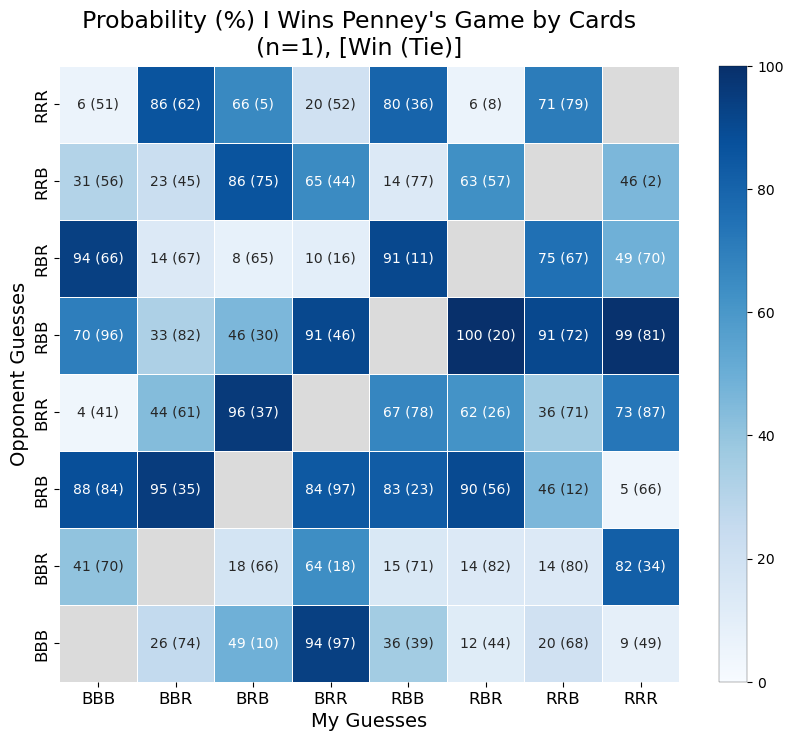

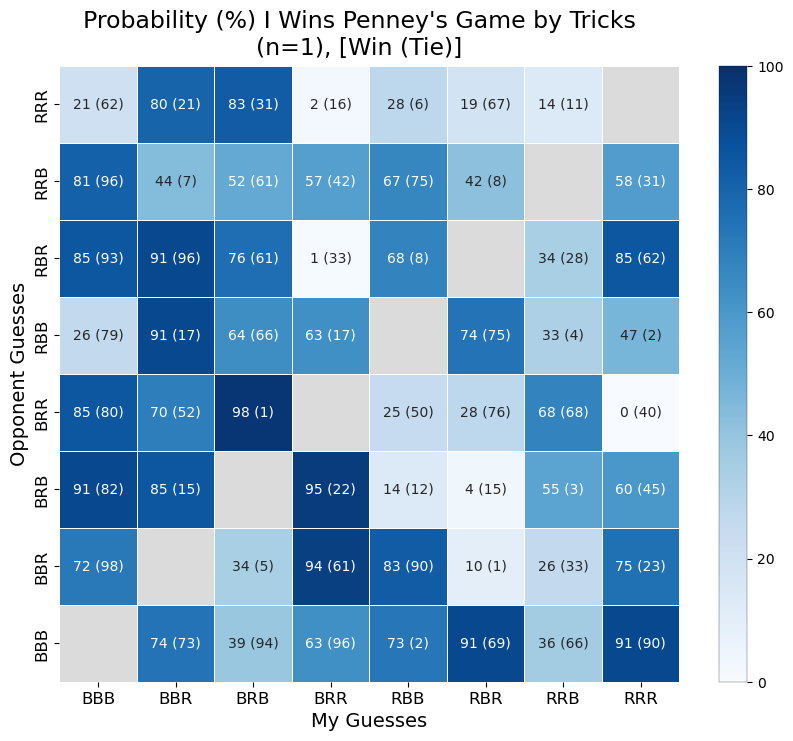

In [40]:
get_heatmaps('png')

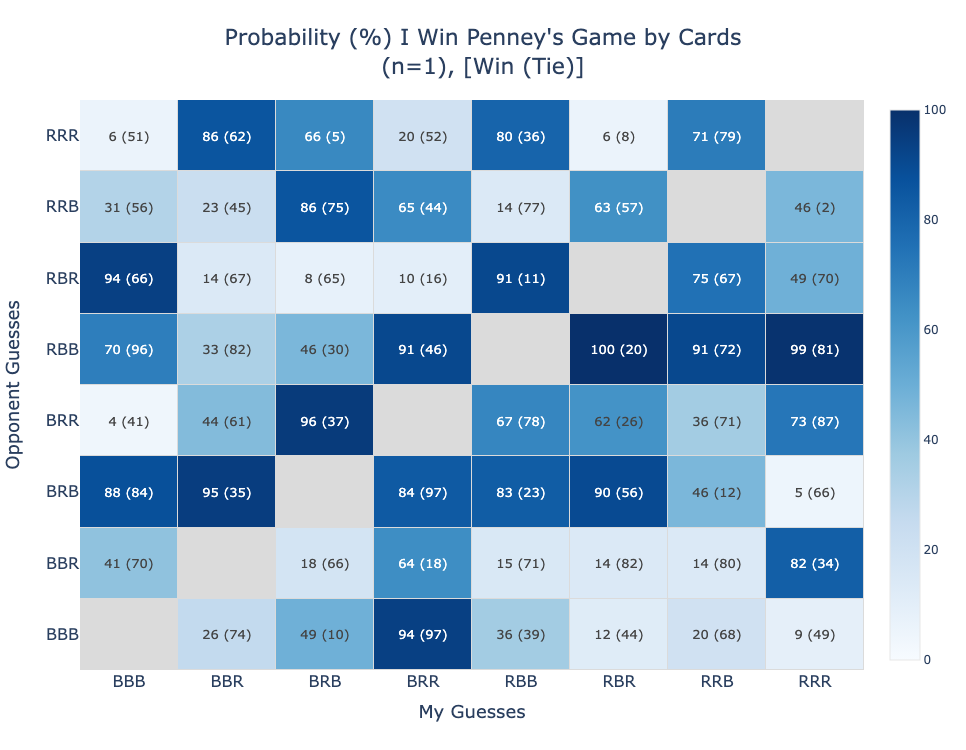

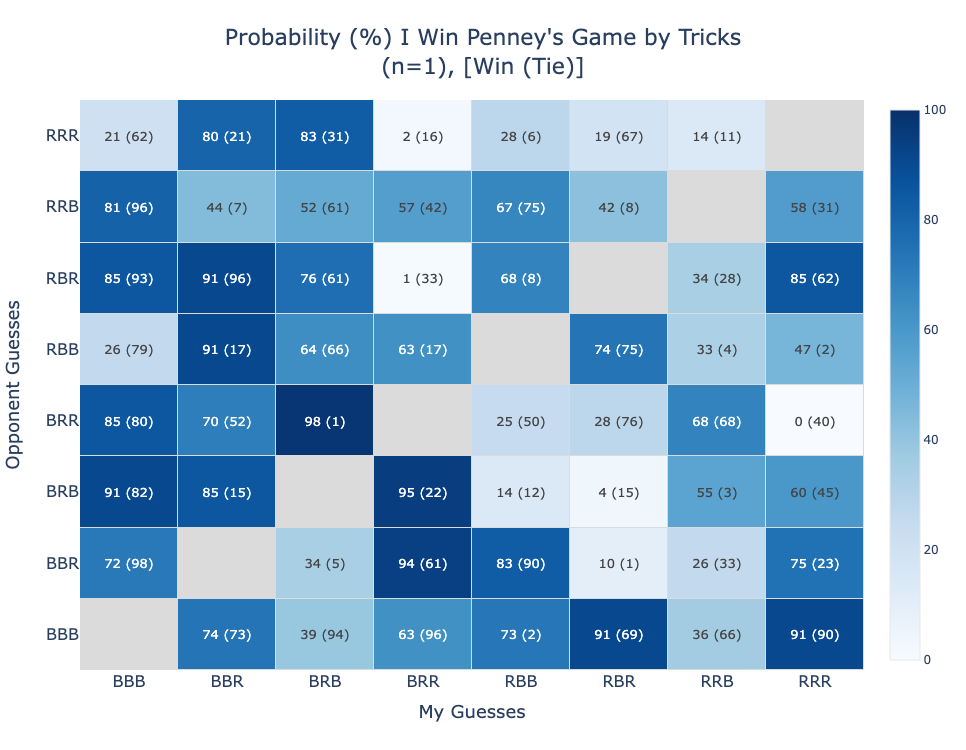

In [44]:
get_heatmaps('html')